In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import math
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
area_price=pd.read_csv("/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data_exploration_ml/Area_Price.csv")

In [3]:
area_price

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
...,...,...
94,4844,617067
95,9273,740444
96,6130,812544
97,9806,677646


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Area', ylabel='Price'>

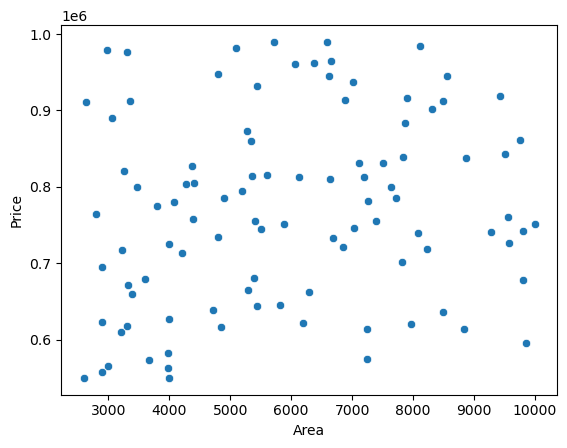

In [4]:
sns.scatterplot(x='Area',y='Price',data=area_price)

In [5]:
x=area_price.drop('Price',axis=1)
y=area_price['Price']

In [6]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(    Area
 49  3302
 70  8491
 68  6588
 15  4204
 39  3983
 ..   ...
 60  7025
 71  7718
 14  4073
 92  4712
 51  6876
 
 [79 rows x 1 columns],
     Area
 62  5876
 40  4393
 95  9273
 18  8229
 97  9806
 84  5436
 64  7250
 42  8105
 10  4900
 0   2600
 31  3253
 76  8492
 47  5272
 26  5358
 44  7510
 4   4000
 22  5090
 12  4400
 88  7387
 73  2897,
 49    976026
 70    635957
 68    988978
 15    713918
 39    582040
        ...  
 60    745573
 71    784970
 14    780196
 92    638635
 51    914000
 Name: Price, Length: 79, dtype: int64,
 62    751103
 40    757789
 95    740444
 18    718395
 97    677646
 84    932095
 64    614333
 42    984343
 10    785000
 0     550000
 31    820140
 76    911984
 47    873188
 26    814657
 44    831526
 4     725000
 22    981871
 12    805000
 88    755020
 73    694530
 Name: Price, dtype: int64)

In [7]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [8]:
input = np.array([3300])

In [9]:
input_reshaped = input.reshape(-1, 1)
prediction = linear_reg.predict(input_reshaped)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
prediction

array([735187.38697518])

In [11]:
linear_reg.coef_

array([11.48131018])

In [12]:
linear_reg.intercept_

697299.063378724

In [13]:
11.48131018*3300+697299.063378724

735187.386972724

In [14]:
y_pred=linear_reg.predict(x_test)
y_pred

array([764763.24200078, 747736.45900274, 803765.25268478, 791778.76485608,
       809884.79101111, 759711.46552126, 780538.56218913, 790355.08239367,
       753557.48326438, 727150.46984866, 734647.76539669, 794798.34943362,
       757828.53065161, 758815.92332716, 783523.70283612, 743224.30410171,
       755738.93219872, 747816.828174  , 782111.50168389, 730560.41897234])

In [23]:
#calculation of evaluation of regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

12552683097.803013

In [24]:
rmse = np.sqrt(mse)
rmse

112038.75712360886

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mae

91018.43925742629

In [18]:
msae = mae ** 2
print(f"Mean Squared Absolute Error (MSAE): {msae}")
# Mean Squared Absolute Error (MSAE) - There is no direct function, we can define it as MAE squared

Mean Squared Absolute Error (MSAE): 8284356284.8578


In [19]:
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MedAE): {medae}")

Median Absolute Error (MedAE): 68352.50877042825


In [20]:
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

Explained Variance Score: 0.01113702975494879


In [21]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: -0.022386426258041325


In [22]:
n = len(y_test)  # Number of observations
p = 1  # Number of predictor variables
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 Score: {adjusted_r2}")

Adjusted R^2 Score: -0.07918567216126582


In [26]:
import statsmodels.api as sm

In [27]:
model_OLS = sm.OLS(y_train, x_train)
results = model_OLS.fit()
results.summary()
#OLS-ordinary least squares:It is a type of linear regression model for estimating the parameters in a linear regression model. The goal of OLS is to find the line that minimizes the sum of squared differences (of residuals) between observed values and values predicted by the model.
#It assumes linear relationship between the dependent and independent variables of the model and expresses the dependent variable 'y' as a linear combination of one or more independent variables 'x'.
#Objective of OLS is to estimate the coefficients Beta(i)such that the sum of squared residuals is minimized.
#Assumptions of OLS- The relationship between dependent and independent variables is linear, the observations are independent of each other and there is constant variance of the errors. The errors are normally distributed and there is no multi-collinearity meaning that the independent variables are not highly correlated.
#Note-OLS does not perform well generally if the assumptions are violated

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              581.5
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                    6.66e-38
Time:                        22:36:07   Log-Likelihood:                         -1099.1
No. Observations:                  79   AIC:                                      2200.
Df Residuals:                      78   BIC:                                      2203.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Area         115.5052      4.790     24.114      0.000     105.969     125.041
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.587
Skew:                          -0.158   Prob(JB):                        0.746
Kurtosis:                       2.721   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y_pred_OLS = results.predict(x_test)

In [29]:
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
mse_OLS

72819053676.66666

In [30]:
rmse_OLS = np.sqrt(mse_OLS)
rmse_OLS

269850.0577666543

In [31]:
mae_OLS = mean_absolute_error(y_test, y_pred_OLS)
mae_OLS

240286.88473731125